In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

sns.set_theme(style="ticks")

In [7]:
df = pd.read_csv('dataset.csv', names=['score', 'password'])
df.head()

,score,password
0,0,123456
1,0,12345
2,0,123456789
3,0,password
4,0,iloveyou


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14344390 entries, 0 to 14344389
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   score     int64 
 1   password  object
dtypes: int64(1), object(1)
memory usage: 218.9+ MB


We define different helper functions to simply count the type of characters in a given password. For example $numbers_only$ gives us the count of numerical digits in the password

In [9]:
import string, re

# Helper functions
def count(password, chartype):
    c = 0
    for char in password:
        if char in chartype:
            c += 1
    return c

def check_ascii(text):
    for each_char in text:
        if each_char not in string.ascii_lowercase + string.ascii_uppercase + string.digits + string.punctuation:
            return False
    else:
        return True

In [10]:
alpha_count = lambda password: len(re.findall("[a-zA-Z]", password))
digit_count = lambda password: len(re.findall("[0-9]", password))
special_count = lambda password: count(password, string.punctuation)

def letters_only(password):
    letter_count = count(password, string.ascii_lowercase + string.ascii_uppercase)

    if len(password) == letter_count:
        return 1
    return 0

def numbers_only(password):
    digit_count = count(password, string.digits)

    if len(password) == digit_count:
        return 1
    return 0

In [11]:
import math

def entropy(password):
    R = 0
    upper = 0
    lower = 0
    digit = 0
    special = 0

    for char in password:
        if char in string.ascii_uppercase:
            upper = 26
        elif char in string.ascii_lowercase:
            lower = 26
        elif char in string.digits:
            digit = 10
        elif char in string.punctuation:
            special = 32

    R = upper + lower + digit + special
    ent = math.log2(R ** (len(password)))
    return round(ent, 2)

In [12]:
#Example on a simple password

password = "P@ssw0rd" 
print(alpha_count(password))
print(digit_count(password))
print(special_count(password))

print(letters_only(password))
print(numbers_only(password))

print(entropy(password))

6
1
1
0
0
52.44


In [13]:
# Remove passwords if they have characters other than the ones supported by ASCII encoding
df['password'] = df['password'].apply(str)
df['check'] = df['password'].apply(check_ascii)

In [14]:
df = df[df['check'] == True]

In [15]:
df.info() #14259510

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14259510 entries, 0 to 14344106
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   score     int64 
 1   password  object
 2   check     bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 340.0+ MB


In [16]:
df.drop('check', axis=1, inplace=True)

In [17]:
df['alpha_count'] = df['password'].apply(alpha_count)
df['digit_count'] = df['password'].apply(digit_count)
df['special_count'] = df['password'].apply(special_count)
df['letters_only'] = df['password'].apply(letters_only)
df['numbers_only'] = df['password'].apply(numbers_only)
df['entropy'] = df['password'].apply(entropy)

In [18]:
df.head()

,score,password,alpha_count,digit_count,special_count,letters_only,numbers_only,entropy
0,0,123456,0,6,0,0,1,19.93
1,0,12345,0,5,0,0,1,16.61
2,0,123456789,0,9,0,0,1,29.90
3,0,password,8,0,0,1,0,37.60
4,0,iloveyou,8,0,0,1,0,37.60


In [19]:
#df.to_csv('passwd-features.csv', index=False)

# EDA

In [20]:
passwd = pd.read_csv('./passwd-features.csv')
passwd.head()

,score,password,alpha_count,digit_count,special_count,letters_only,numbers_only,entropy
0,0,123456,0,6,0,0,1,19.93
1,0,12345,0,5,0,0,1,16.61
2,0,123456789,0,9,0,0,1,29.90
3,0,password,8,0,0,1,0,37.60
4,0,iloveyou,8,0,0,1,0,37.60


In [21]:
passwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259510 entries, 0 to 14259509
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   score          int64  
 1   password       object 
 2   alpha_count    int64  
 3   digit_count    int64  
 4   special_count  int64  
 5   letters_only   int64  
 6   numbers_only   int64  
 7   entropy        float64
dtypes: float64(1), int64(6), object(1)
memory usage: 870.3+ MB


In [22]:
passwd.describe()

,score,alpha_count,digit_count,special_count,letters_only,numbers_only,entropy
count,1.425951e+07,1.425951e+07,1.425951e+07,1.425951e+07,1.425951e+07,1.425951e+07,1.425951e+07
mean,1.978326e+00,5.698282e+00,2.932162e+00,9.570483e-02,2.886014e-01,1.645740e-01,4.225058e+01
std,9.151616e-01,3.703729e+00,3.148467e+00,4.859511e-01,4.531122e-01,3.707956e-01,1.453935e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.320000e+00
25%,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.290000e+01
50%,2.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.136000e+01
75%,3.000000e+00,8.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.870000e+01
max,4.000000e+00,2.550000e+02,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.671420e+03


<AxesSubplot:xlabel='score', ylabel='count'>

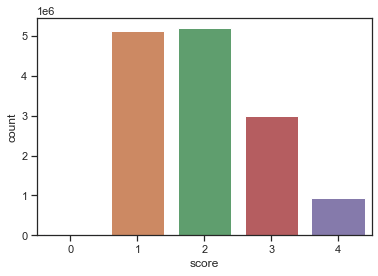

In [23]:
sns.countplot(x=passwd['score'])

As can be seen from the above plot the data is not evenly distributed 

<AxesSubplot:xlabel='score', ylabel='alpha_count'>

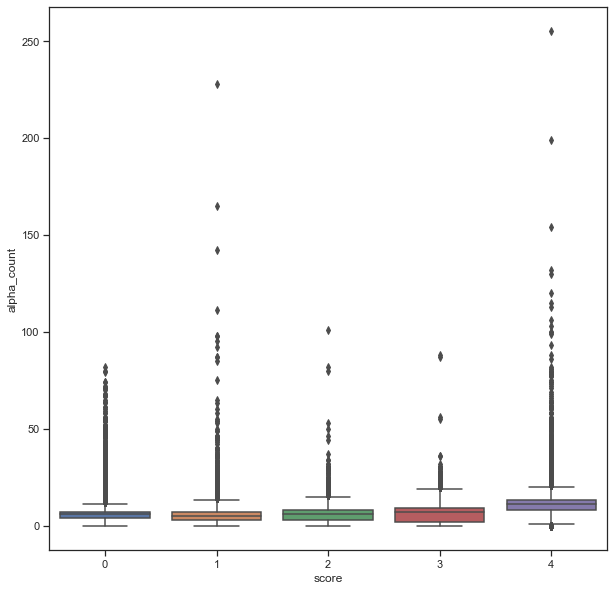

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x=passwd['score'], y=passwd['alpha_count'])

<AxesSubplot:xlabel='score', ylabel='digit_count'>

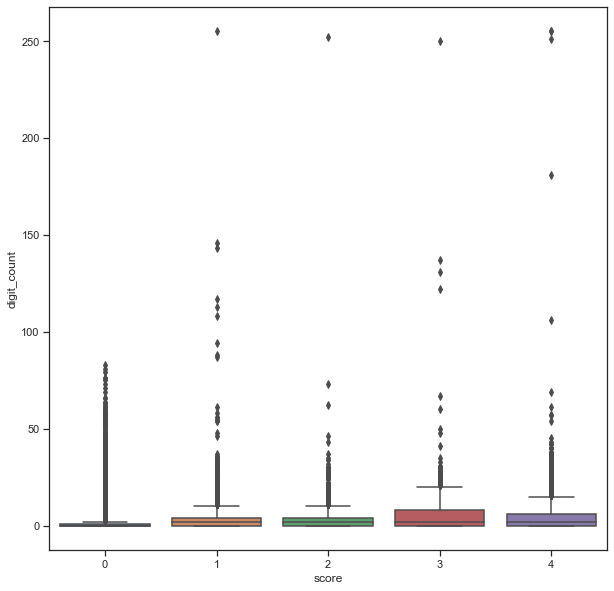

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x=passwd['score'], y=passwd['digit_count'])

<AxesSubplot:xlabel='score', ylabel='special_count'>

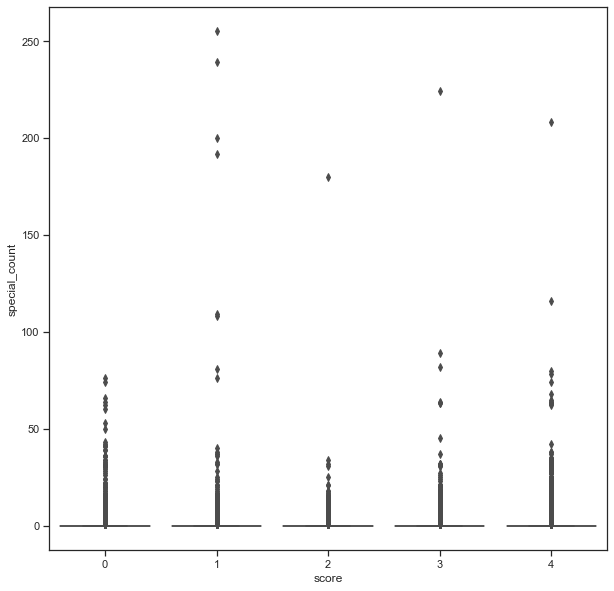

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x=passwd['score'], y=passwd['special_count'])

<AxesSubplot:xlabel='letters_only', ylabel='count'>

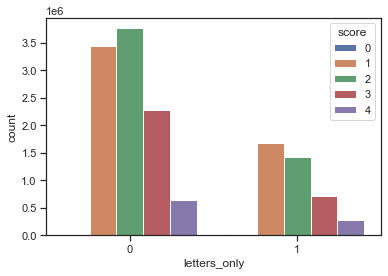

In [27]:
sns.countplot(x='letters_only', hue='score', data=passwd)

<AxesSubplot:xlabel='numbers_only', ylabel='count'>

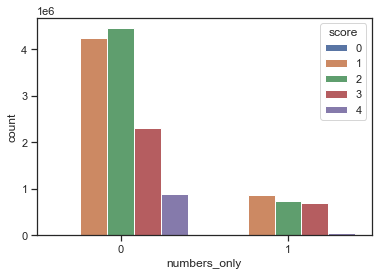

In [28]:
sns.countplot(x='numbers_only', hue='score', data=passwd)

# Strength Prediction Using Random Forests

We will be predicting whether a password is $Strong$ $Moderate$ or $Weak$ . For this we are using a rather smaller 8mb dataset from kaggle. We have trained a $Random$ $Forest$ $Classifier$ that predicts out which out of the above mentioned class the password belongs to 

In [41]:
data=pd.read_csv('data.csv',error_bad_lines=False)

C:\Users\abhin\AppData\Local\Temp/ipykernel_21008/22183518.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('data.csv',error_bad_lines=False)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields,

In [42]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [43]:
data.shape

(669640, 2)

In [44]:
data.strength.unique()

array([1, 2, 0], dtype=int64)

In [45]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [46]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [47]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='count'>

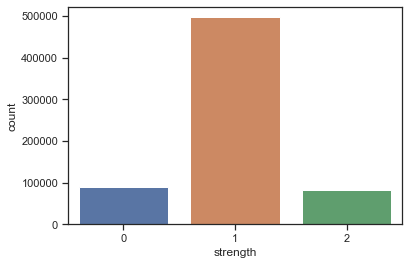

In [48]:
sns.countplot(data['strength'])

As can be seen from above plot , we have a lot of bias in data towards the password that are not too strong and not too weak

In [49]:
pass_tup=np.array(data)
pass_tup

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [50]:
import random
random.shuffle(pass_tup)
x=[labels[0] for labels in pass_tup] #Contains the actual passwords
y=[labels[1] for labels in pass_tup] #Contains the strength or class of the password

In [52]:
def word_divider(words):
    char=[]
    for i in words:
        char.append(i)
    return char
#Example
word_divider('asdf57')

['a', 's', 'd', 'f', '5', '7']

In [53]:
# We use a vectorizer to convert texual passwords into a numerical vector
# Equivalent to CountVectorizer followed by TfidfTransformer.
# We will basically map some features to their frequencies in the password


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(tokenizer=word_divider)

In [78]:
X=vectorizer.fit_transform(x)
X.shape

(669639, 131)

These are the different types of features that will each have a corresponding frequency as value in the final vector that we will be using to train our Machine Learning Model

In [98]:
# 20 example feature classes there are 131 in total
vectorizer.get_feature_names()[:20]

['\x01',
 '\x02',
 '\x05',
 '\x06',
 '\x0f',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&']

In [100]:
first_document_vector=X[0]
first_document_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

An example of a vector that is generated corresponding to a password

In [70]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56666604],
        [0.        ],
        [0.59153629],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [58]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDE'])
df.sort_values(by=['TF-IDE'],ascending=False)

,TF-IDE
7,0.591536
5,0.566666
z,0.336257
k,0.291781
d,0.285866
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape

(535711, 131)

In [60]:
rn=RandomForestClassifier(n_estimators=10,criterion='entropy')
rn.fit(X_train,y_train)

y_pred=rn.predict(X_test)

In [61]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[16839  1254     1]
 [  472 98434   200]
 [   16   763 15949]]
0.9797951137924855


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18094
           1       0.98      0.99      0.99     99106
           2       0.99      0.95      0.97     16728

    accuracy                           0.98    133928
   macro avg       0.98      0.96      0.97    133928
weighted avg       0.98      0.98      0.98    133928



# How will I find out if my password is strong ?

In a nutshell , we have used a vectorizer to convert each password into a frequency based vector that is, each letter in the password corresponds to a dimension in the vector , which is intern passed to a Random Forest Classifier that classifies it and tells us whether the password is Strong(2) , Moderate(1) or Weak(0)

In [90]:
def getStrength(password):
    strength = rn.predict(vectorizer.transform([password]))
    if strength[0] == 0:
        print('Weak Password')
    elif strength[0] == 1:
        print('Okayish Password')
    else:
        print('Strong Password')

In [92]:
getStrength('batman')

Weak Password


In [94]:
getStrength('batman1234')

Okayish Password


In [95]:
getStrength('batman12@##%')

Strong Password
